In [1]:
# Description: This program uses the Moving Average Convergence/Divergence (MACD) crossover
#              to determine when to buy and sell stock.

In [2]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
plt.style.use('fivethirtyeight')


Bad key "text.kerning_factor" on line 4 in
C:\Users\joon7\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
# Store the data into a df
# 005930.KS is the ticker for Samsung Electronics.
df = web.DataReader('005930.KS', data_source='yahoo', start='2020-10-01', end='2022-03-02')
# Take a look at the data
df = df.set_index(pd.DatetimeIndex(df.index.values))
# Show the data
df

,High,Low,Open,Close,Volume,Adj Close
2020-10-05,59200.0,57500.0,57500.0,58700.0,20228289.0,56231.925781
2020-10-06,59900.0,58700.0,59400.0,59000.0,14463826.0,56519.312500
2020-10-07,59900.0,58500.0,58700.0,59900.0,14861838.0,57381.476562
2020-10-08,60700.0,59500.0,60500.0,59700.0,24589924.0,57189.882812
2020-10-12,60400.0,59900.0,60000.0,60400.0,16145837.0,57860.453125
...,...,...,...,...,...,...
2022-02-23,74300.0,74300.0,74300.0,74300.0,0.0,74300.000000
2022-02-24,72300.0,71300.0,72300.0,71500.0,15759283.0,71500.000000
2022-02-25,72600.0,71900.0,72100.0,71900.0,13168484.0,71900.000000
2022-02-28,71900.0,71900.0,71900.0,71900.0,0.0,71900.000000


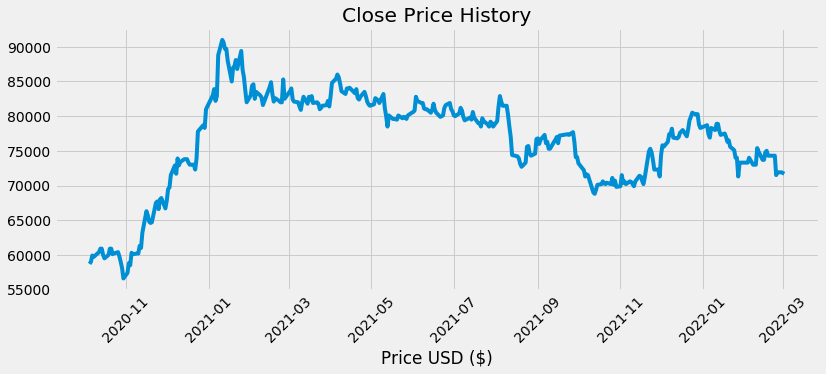

In [4]:
# Visually show the stock price
plt.figure(figsize=(12.2, 4.5))
plt.plot(df['Close'], label='Close')
plt.xticks(rotation = 45)
plt.title('Close Price History')
plt.xlabel('Date')
plt.xlabel('Price USD ($)')
plt.show()

In [5]:
# Calculate the MACD and signal line indicaters
# Calculate the short term exponential moving average (EMA)
# Usually short term lasts 12 periods
ShortEMA = df.Close.ewm(span=12, adjust=False).mean()

# Calculate the long term exponential moving average (EMA)
# Usually long term lasts 26 periods
LongEMA =df.Close.ewm(span=26, adjust=False).mean()
# Calculate the MACD line
MACD = -(ShortEMA - LongEMA)
# Calculate the signal line
signal = MACD.ewm(span=9, adjust=False).mean()
difference = MACD - signal

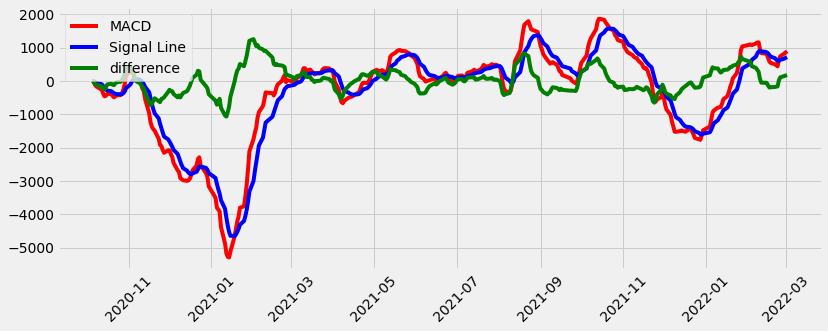

In [6]:
# plot the chart
plt.figure(figsize=(12.2, 4.5))
plt.plot(df.index, MACD, label = 'MACD', color='red')
plt.plot(df.index, signal, label = 'Signal Line', color = 'blue')
plt.plot(df.index, difference, label = 'difference', color = 'green')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()

In [7]:
# Create new columns for the data
df['MACD'] = MACD
df['Signal Line'] = signal
df['Difference'] = difference
# Show the data
df

,High,Low,Open,Close,Volume,Adj Close,MACD,Signal Line,Difference
2020-10-05,59200.0,57500.0,57500.0,58700.0,20228289.0,56231.925781,-0.000000,-0.000000,0.000000
2020-10-06,59900.0,58700.0,59400.0,59000.0,14463826.0,56519.312500,-23.931624,-4.786325,-19.145299
2020-10-07,59900.0,58500.0,58700.0,59900.0,14861838.0,57381.476562,-114.203618,-26.669784,-87.533835
2020-10-08,60700.0,59500.0,60500.0,59700.0,24589924.0,57189.882812,-167.673658,-54.870559,-112.803100
2020-10-12,60400.0,59900.0,60000.0,60400.0,16145837.0,57860.453125,-263.495785,-96.595604,-166.900181
...,...,...,...,...,...,...,...,...,...
2022-02-23,74300.0,74300.0,74300.0,74300.0,0.0,74300.000000,438.448180,601.114889,-162.666710
2022-02-24,72300.0,71300.0,72300.0,71500.0,15759283.0,71500.000000,631.685351,607.228982,24.456369
2022-02-25,72600.0,71900.0,72100.0,71900.0,13168484.0,71900.000000,743.974470,634.578079,109.396390
2022-02-28,71900.0,71900.0,71900.0,71900.0,0.0,71900.000000,823.471934,672.356850,151.115083


In [8]:
# Create a function ot to signal when to buy and sell an asset
def buy_sell(signal):
    Buy = []
    Sell = []
    # flag tells after crossing a specific point, if it increases or not
    flag = -1
    
    for i in range(0, len(signal)):
        if signal['MACD'][i] > signal['Signal Line'][i]:
            Sell.append(np.nan)
            if flag != 1:
                Buy.append(signal['Close'][i])
                flag = 1
            else:
                Buy.append(np.nan)
        elif signal['MACD'][i] < signal['Signal Line'][i]:
            Buy.append(np.nan)
            if flag != 0:
                Sell.append(signal['Close'][i])
                flag = 0
            else:
                Sell.append(np.nan)        
        else:
            Buy.append(np.nan)
            Sell.append(np.nan)
    return (Buy, Sell)

In [9]:
# Create buy and sell column
a = buy_sell(df)
df['Buy_Signal_Price'] = a[0]
df['Sell_Signal_Price'] = a[1]

In [10]:
# Show the data
df

,High,Low,Open,Close,Volume,Adj Close,MACD,Signal Line,Difference,Buy_Signal_Price,Sell_Signal_Price
2020-10-05,59200.0,57500.0,57500.0,58700.0,20228289.0,56231.925781,-0.000000,-0.000000,0.000000,NaN,NaN
2020-10-06,59900.0,58700.0,59400.0,59000.0,14463826.0,56519.312500,-23.931624,-4.786325,-19.145299,NaN,59000.0
2020-10-07,59900.0,58500.0,58700.0,59900.0,14861838.0,57381.476562,-114.203618,-26.669784,-87.533835,NaN,NaN
2020-10-08,60700.0,59500.0,60500.0,59700.0,24589924.0,57189.882812,-167.673658,-54.870559,-112.803100,NaN,NaN
2020-10-12,60400.0,59900.0,60000.0,60400.0,16145837.0,57860.453125,-263.495785,-96.595604,-166.900181,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-02-23,74300.0,74300.0,74300.0,74300.0,0.0,74300.000000,438.448180,601.114889,-162.666710,NaN,NaN
2022-02-24,72300.0,71300.0,72300.0,71500.0,15759283.0,71500.000000,631.685351,607.228982,24.456369,71500.0,NaN
2022-02-25,72600.0,71900.0,72100.0,71900.0,13168484.0,71900.000000,743.974470,634.578079,109.396390,NaN,NaN
2022-02-28,71900.0,71900.0,71900.0,71900.0,0.0,71900.000000,823.471934,672.356850,151.115083,NaN,NaN


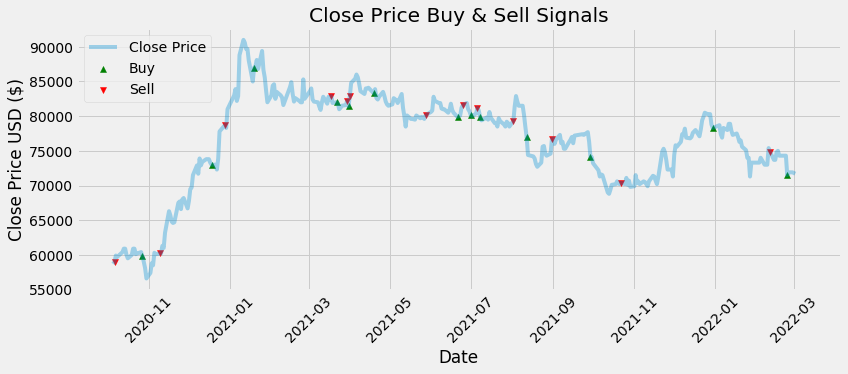

In [11]:
# Visually show the stock buy and sell signals
plt.figure(figsize=(12.2, 4.5))
plt.scatter(df.index, df['Buy_Signal_Price'], color='green', label='Buy', marker='^', alpha=1)
plt.scatter(df.index, df['Sell_Signal_Price'], color='red', label='Sell', marker='v', alpha=1)
plt.plot(df['Close'], label='Close Price', alpha = 0.35)
plt.title('Close Price Buy & Sell Signals')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.legend(loc = 'upper left')
plt.show()